In [18]:
import warnings
warnings.filterwarnings("ignore")

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectPercentile, f_regression, RFECV

In [2]:
house_price = pd.read_csv("Data/housing_iter_7/housing_prices.csv")
house_price

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
house_price.drop(columns = ["Id", "Alley", "FireplaceQu", "PoolQC", "Fence", "MiscFeature"], inplace = True)

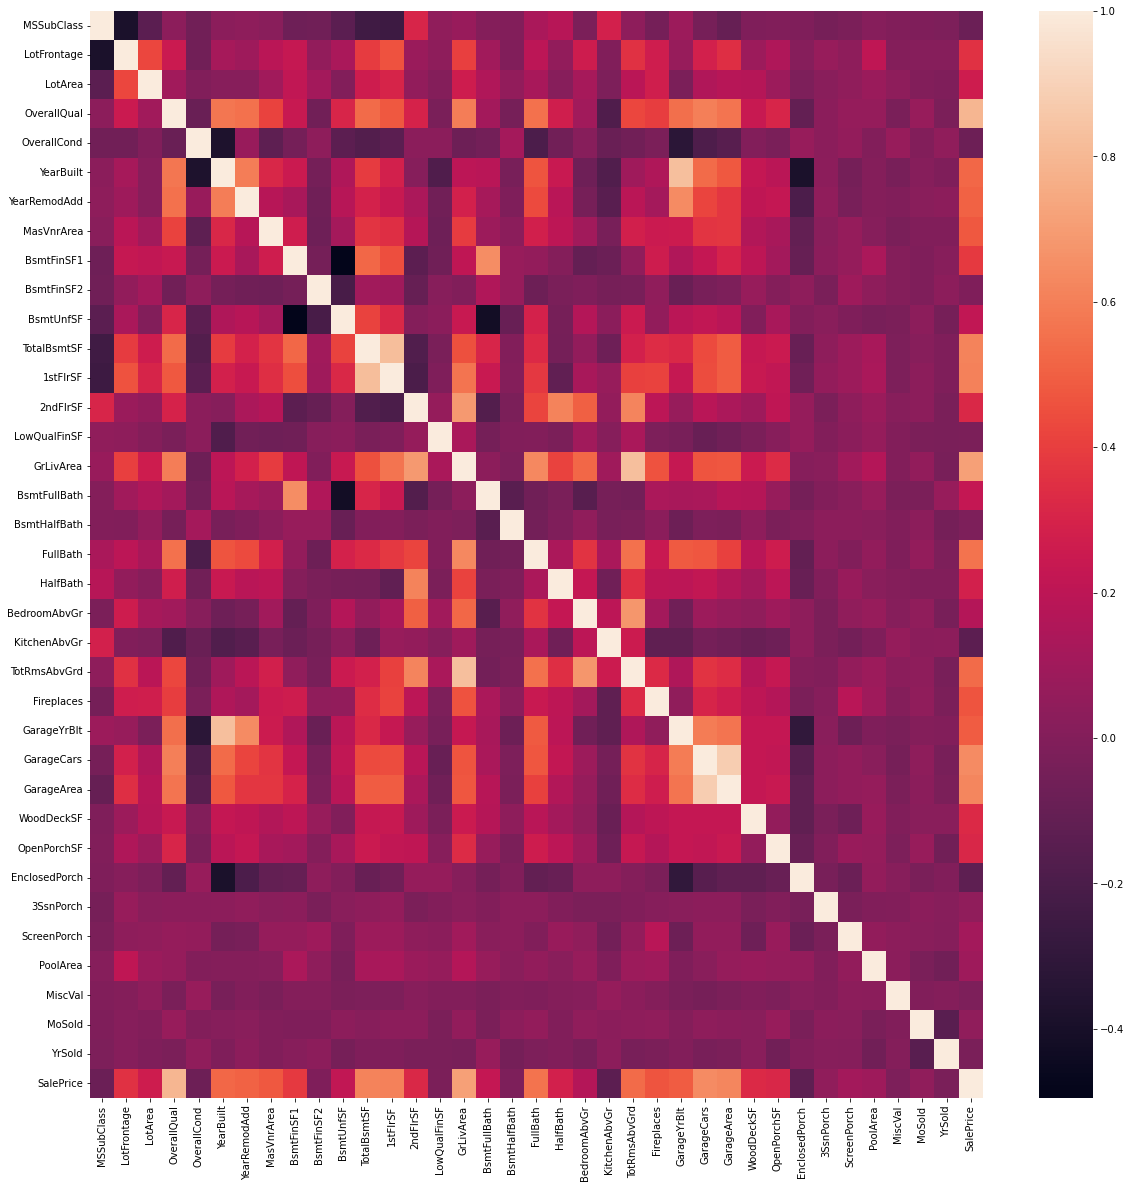

In [5]:
fig, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(house_price.corr());

In [6]:
corr = house_price.corr()
corr_values = corr.unstack()
corr_values = corr_values.loc[corr_values != 1]
corr_values.sort_values(ascending = False).head(20)

GarageCars    GarageArea      0.882475
GarageArea    GarageCars      0.882475
GarageYrBlt   YearBuilt       0.825667
YearBuilt     GarageYrBlt     0.825667
TotRmsAbvGrd  GrLivArea       0.825489
GrLivArea     TotRmsAbvGrd    0.825489
TotalBsmtSF   1stFlrSF        0.819530
1stFlrSF      TotalBsmtSF     0.819530
OverallQual   SalePrice       0.790982
SalePrice     OverallQual     0.790982
              GrLivArea       0.708624
GrLivArea     SalePrice       0.708624
2ndFlrSF      GrLivArea       0.687501
GrLivArea     2ndFlrSF        0.687501
BedroomAbvGr  TotRmsAbvGrd    0.676620
TotRmsAbvGrd  BedroomAbvGr    0.676620
BsmtFinSF1    BsmtFullBath    0.649212
BsmtFullBath  BsmtFinSF1      0.649212
YearRemodAdd  GarageYrBlt     0.642277
GarageYrBlt   YearRemodAdd    0.642277
dtype: float64

In [7]:
# drop columns with correlation higher than 0.8
corr_matrix = house_price.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
house_price.drop(columns = to_drop, inplace = True)

/var/folders/l7/1vvcr1f15s9dpkc1xqbr10gc0000gn/T/ipykernel_8585/1456434819.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(np.bool))


In [8]:
house_price[["OverallQual", "OverallCond"]] = house_price[["OverallQual", "OverallCond"]].astype(str)

In [9]:
y = house_price.pop("SalePrice")
X = house_price.copy()

In [10]:
# split the dataset into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [11]:
# select categorical and numerical column names
X_num_col = X.select_dtypes(include = "number").copy().columns
X_cat_col = X.select_dtypes(exclude = "number").copy().columns

# define ordinal and onehot columns
onehot_col = X_cat_col.get_indexer(["MSZoning", "Street", "LotShape", "LandContour", "Utilities", "LotConfig",
                                    "LandSlope", "Neighborhood", "Condition1", "Condition2", "BldgType", 
                                    "HouseStyle", "RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd", 
                                    "MasVnrType", "Foundation", "Heating", "CentralAir", "GarageType", 
                                    "GarageFinish", "PavedDrive", "SaleType", "SaleCondition"])
ord_col = X_cat_col.get_indexer(["OverallQual", "OverallCond", "ExterQual", "ExterCond", "BsmtQual", 
                                 "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "HeatingQC", 
                                 "Electrical", "KitchenQual", "Functional", "GarageQual", "GarageCond"])

# define categories for all ordinal columns
overqual_cat = ["10", "9", "8", "7", "6", "5", "4", "3", "2", "1", "NA"]
overcond_cat = ["10", "9", "8", "7", "6", "5", "4", "3", "2", "1", "NA"]
exqual_cat = ["Ex", "Gd", "TA", "Fa", "Po", "NA"]
excond_cat = ["Ex", "Gd", "TA", "Fa", "Po", "NA"]
bsmtqual_cat = ["Ex", "Gd", "TA", "Fa", "Po", "NA"]
bsmtcond_cat = ["Ex", "Gd", "TA", "Fa", "Po", "NA"]
bsmtexp_cat = ["Gd", "Av", "Mn", "No", "NA"]
bsmtfin1_cat = ["GLQ", "ALQ", "BLQ", "Rec", "LwQ", "Unf", "NA"]
bsmtfin2_cat = ["GLQ", "ALQ", "BLQ", "Rec", "LwQ", "Unf", "NA"]
heatqc_cat = ["Ex", "Gd", "TA", "Fa", "Po", "NA"]
elec_cat = ["SBrkr", "FuseA", "FuseF", "FuseP", "Mix", "NA"]
kitqual_cat = ["Ex", "Gd", "TA", "Fa", "Po", "NA"] 
func_cat = ["Typ", "Min1", "Min2", "Mod", "Maj1", "Maj2", "Sev", "Sal", "NA"]
garqual_cat = ["Ex", "Gd", "TA", "Fa", "Po", "NA"]
garcond_cat = ["Ex", "Gd", "TA", "Fa", "Po", "NA"]

# define encoder for all categorial columns
categorical_encoder = make_column_transformer(
    (OneHotEncoder(handle_unknown = "ignore"), onehot_col),
    (OrdinalEncoder(categories = [overqual_cat, overcond_cat, exqual_cat, excond_cat, bsmtqual_cat, 
                                  bsmtcond_cat, bsmtexp_cat, bsmtfin1_cat, bsmtfin2_cat, heatqc_cat, elec_cat,
                                  kitqual_cat, func_cat, garqual_cat, garcond_cat]), ord_col))

# create pipeline for all categorical columns
cat_pipeline = make_pipeline(SimpleImputer(strategy = "constant", fill_value = "NA"), categorical_encoder)

# create pipeline for all numerical columns
num_pipeline = make_pipeline(SimpleImputer(), StandardScaler())

# create pipeline for the entire preprocessing for all columns
preprocess = ColumnTransformer(transformers = [("num_pipeline", num_pipeline, X_num_col),
                                               ("cat_pipeline", cat_pipeline, X_cat_col)])

In [20]:
# create a full pipeline with the random forest model
forest_pipeline = make_pipeline(preprocess, SelectPercentile(f_regression), RandomForestRegressor())
forest_pipeline.fit(X_train, y_train)
y_train_forest_pred = forest_pipeline.predict(X_train)
y_train_forest_pred

array([225648.38 , 237026.   , 146848.25 , ..., 324903.81 , 113756.845,
       258429.39 ])

In [21]:
print("MSE:", mean_squared_error(y_train, y_train_forest_pred))
print("RMSE:", mean_squared_error(y_train, y_train_forest_pred)**0.5)
print("MAE:", mean_absolute_error(y_train, y_train_forest_pred))
print("R squared:", r2_score(y_train, y_train_forest_pred))

MSE: 156207333.28271085
RMSE: 12498.293214783804
MAE: 7063.900726312786
R squared: 0.9751094405084462


In [24]:
forest_param_grid = {"columntransformer__num_pipeline__simpleimputer__strategy": ["mean", "median"],
                     "selectpercentile__percentile": range(10, 81, 5),
                     "randomforestregressor__n_estimators": range(90, 111, 10),
                     # "randomforestregressor__criterion": ["squared_error", "absolute_error", "poisson"],
                     "randomforestregressor__max_depth": range(1, 10),
                     # "randomforestregressor__min_samples_leaf": range(5, 31, 5),
                     # "randomforestregressor__max_features": ["sqrt", "log2"],
                     # "randomforestregressor__bootstrap": [True, False]                    
                    }
forest_search = GridSearchCV(forest_pipeline, forest_param_grid, cv = 5, verbose = 1)
forest_search.fit(X_train, y_train)

Fitting 5 folds for each of 810 candidates, totalling 4050 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num_pipeline',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['MSSubClass', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '2ndFlrSF', 'L...
                                        SelectPercentile(score_func=<function f_regression at 0x7fd0033ceee0>)),
                                 

In [25]:
forest_search.best_params_

{'columntransformer__num_pipeline__simpleimputer__strategy': 'mean',
 'randomforestregressor__max_depth': 9,
 'randomforestregressor__n_estimators': 100,
 'selectpercentile__percentile': 30}

In [26]:
forest_search.best_score_

0.8584780497506568

In [27]:
y_train_forest_pred = forest_search.predict(X_train)

In [28]:
print("MSE:", mean_squared_error(y_train, y_train_forest_pred))
print("RMSE:", mean_squared_error(y_train, y_train_forest_pred)**0.5)
print("MAE:", mean_absolute_error(y_train, y_train_forest_pred))
print("R squared:", r2_score(y_train, y_train_forest_pred))

MSE: 169826788.30887473
RMSE: 13031.760752441503
MAE: 9116.228548121851
R squared: 0.9729392744320703


In [29]:
y_test_forest_pred = forest_search.predict(X_test)

In [30]:
print("MSE:", mean_squared_error(y_test, y_test_forest_pred))
print("RMSE:", mean_squared_error(y_test, y_test_forest_pred)**0.5)
print("MAE:", mean_absolute_error(y_test, y_test_forest_pred))
print("R squared:", r2_score(y_test, y_test_forest_pred))

MSE: 798709741.5650826
RMSE: 28261.453281193495
MAE: 18301.99279179484
R squared: 0.8757662872681619


In [35]:
rfecv = RFECV(estimator = RandomForestRegressor(), step = 1, scoring = "r2", cv = 4, verbose = 0, n_jobs = -1)
rfecv_pipeline = make_pipeline(preprocess, rfecv)
rfecv_pipeline.fit(X_train, y_train)
y_train_rfecv_pred = rfecv_pipeline.predict(X_train)

Fitting estimator with 217 features.
Fitting estimator with 216 features.
Fitting estimator with 215 features.
Fitting estimator with 214 features.
Fitting estimator with 213 features.
Fitting estimator with 212 features.
Fitting estimator with 211 features.
Fitting estimator with 210 features.
Fitting estimator with 209 features.
Fitting estimator with 208 features.
Fitting estimator with 207 features.
Fitting estimator with 206 features.
Fitting estimator with 205 features.
Fitting estimator with 204 features.
Fitting estimator with 203 features.
Fitting estimator with 202 features.
Fitting estimator with 201 features.


array([228186.18, 240011.93, 149195.75, ..., 312440.81, 112943.19,
       261453.55])

Fitting estimator with 217 features.
Fitting estimator with 216 features.
Fitting estimator with 215 features.
Fitting estimator with 214 features.
Fitting estimator with 213 features.
Fitting estimator with 212 features.
Fitting estimator with 211 features.
Fitting estimator with 210 features.
Fitting estimator with 209 features.
Fitting estimator with 208 features.
Fitting estimator with 207 features.
Fitting estimator with 206 features.
Fitting estimator with 205 features.
Fitting estimator with 204 features.
Fitting estimator with 203 features.
Fitting estimator with 202 features.
Fitting estimator with 201 features.
Fitting estimator with 200 features.
Fitting estimator with 199 features.
Fitting estimator with 198 features.
Fitting estimator with 197 features.
Fitting estimator with 196 features.
Fitting estimator with 195 features.
Fitting estimator with 194 features.
Fitting estimator with 193 features.
Fitting estimator with 192 features.
Fitting estimator with 191 features.
F

In [37]:
print("MSE:", mean_squared_error(y_train, y_train_rfecv_pred))
print("RMSE:", mean_squared_error(y_train, y_train_rfecv_pred)**0.5)
print("MAE:", mean_absolute_error(y_train, y_train_rfecv_pred))
print("R squared:", r2_score(y_train, y_train_rfecv_pred))

MSE: 126790122.13976517
RMSE: 11260.111994992109
MAE: 6636.414631849314
R squared: 0.9797968698924682


In [38]:
y_test_rfecv_pred = rfecv_pipeline.predict(X_test)

In [39]:
print("MSE:", mean_squared_error(y_test, y_test_rfecv_pred))
print("RMSE:", mean_squared_error(y_test, y_test_rfecv_pred)**0.5)
print("MAE:", mean_absolute_error(y_test, y_test_rfecv_pred))
print("R squared:", r2_score(y_test, y_test_rfecv_pred))

MSE: 754677963.6724143
RMSE: 27471.402652074652
MAE: 17249.147123287672
R squared: 0.8826151222843354
